_**PROBLEM 2: Non-Symmetric Random Walk**_

In [2]:
from __future__ import (absolute_import, division, 
                        unicode_literals, print_function)
import numpy as np
import numpy.random as rand
from matplotlib import pyplot as plt
import math
%matplotlib inline

_Consider a random walk which is not necessarily symmetric, where the
probability of a head is given by p  	$\epsilon $(0;1) whereas the probability of a tail is q = 1
What is the expectation of the random walk for p= 0.75?_

The question suggests, this random walk is not necessarily martingale. If it was a martingale, the answer would be $n(2p-1)$

**From the definition of expectation value: 
Suppose random variable X can take value $x_1$ with probability $p_1$, value $x_2$ with probability $p_2$, and so on, up to value $x_k$ with probability $p_k$. Then the expectation of this random variable X is defined as:**
$E[X] = x_1p_1 + x_2p_2 + ... + x_kp_k$ 

In other words, one step increment of the random walk is $E[X_i] = p × 1 + (1 − p) × (−1) = 2p − 1$

Let outcome head = 1 and tail = -1 and n be the number of heads over a total of N steps.   
$E[X] = (1)pn + (-1)(1-p)(N-n) = (2p-1)n+(1-p)N$ where n is the number of heads out of N steps. For p=0.75, $E[X_k|X_0] = 0.5n + (0.25)N$ 

If the process was defined as a _martingale_, this expectation would be $N(2p-1) = (0.5)N$ where N is the number of steps

In [3]:
def non_sym_walk(step_count, p=0.3):
    """Returns the result for one of the possible paths
    """
    walk_path = np.zeros(step_count)
    # Draw samples from a uniform distribution.
    uniform_arr = rand.uniform(size=step_count) # default is between 0 and 1
    # X_0 = 0
    uniform_arr[0] = 0
    for index, x in np.ndenumerate(uniform_arr):
        if x <= p: # since non-symmetric
            walk_path[index[0]] = walk_path[index[0]-1] + 1
        else:
            walk_path[index[0]] = walk_path[index[0]-1] - 1
    return walk_path

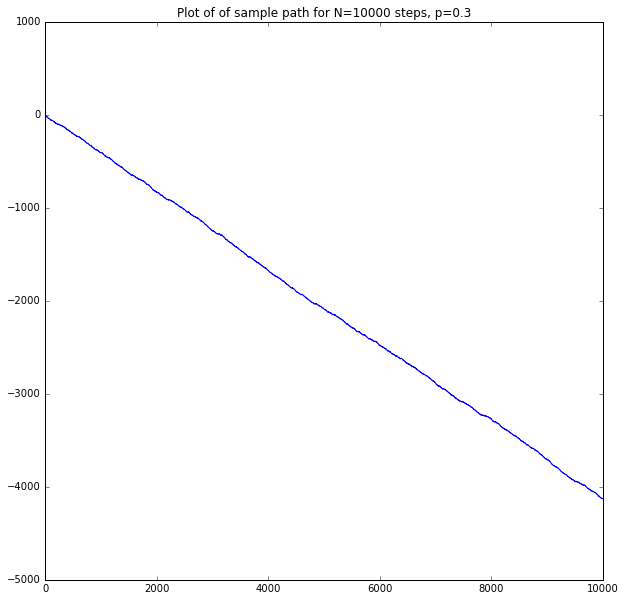

In [4]:
res = non_sym_walk(int(1e4), p=0.3)
fig=plt.figure()
fig.set_size_inches([10,10])
plt.plot(res)
plt.title('Plot of of sample path for N=10000 steps, p=0.3')
plt.show()

This random walk has tendency to go down as probability of heads is less than probability of tails, creating the tendency for a drop in the overall expected value as it is more likely for this walk to go in negative direction than it is to go in positive direction. The question suggests this random walk is not necessarily a martingale. It would be a submartingale if $E(M_{n+1}|F_n) >= M_n$ for all n >= 0

_Answer the 3 previous questions for a random walk corre-
sponding to p = 0.8_

Let outcome head = 1 and tail = -1 and n be the number of heads over a total of N steps.   
$E[X] = (1)pn + (-1)(1-p)(N-n) = (2p-1)n+(1-p)N$ where n is the number of heads out of N steps. For p=0.8, $E[X] = 0.6n + (0.2)N$ 

If the process was defined as a _martingale_, this expectation would be $N(2p-1) = (0.6)N$ where N is again the number of steps where martingality is defined as(Hazewinkel, Michiel, ed. (2001), "Martingale", Encyclopedia of Mathematics, Springer, ISBN 978-1-55608-010-4):

A basic definition of a discrete-time martingale is a discrete-time stochastic process (i.e., a sequence of random variables) X1, X2, X3, ... that satisfies for any time n,

$\mathbf{E} ( \vert X_n \vert )< \infty$
$\mathbf{E} (X_{n+1}\mid X_1,\ldots,X_n)=X_n.$
That is, the conditional expected value of the next observation, given all the past observations, is equal to the last observation. Due to the linearity of expectation, this second requirement is equivalent to:

$\mathbf{E} (X_{n+1} - X_n \mid X_1,\ldots,X_n)=0 or  \mathbf{E} (X_{n+1} \mid X_1,\ldots,X_n)- X_n=0$ 
which states that the average "winnings" from observation n to observation n+1 are 0.

Martingale sequences with respect to another sequence[edit]
More generally, a sequence Y1, Y2, Y3 ... is said to be a martingale with respect to another sequence X1, X2, X3 ... if for all n

$\mathbf{E} ( \vert Y_n \vert )< \infty $
$\mathbf{E} (Y_{n+1}\mid X_1,\ldots,X_n)=Y_n.$
Similarly, a continuous-time martingale with respect to the stochastic process Xt is a stochastic process Yt such that for all t

$\mathbf{E} ( \vert Y_t \vert )<\infty $
$\mathbf{E} ( Y_{t} \mid \{ X_{\tau}, \tau \leq s \} ) = Y_s\quad \forall s \le t.$
This expresses the property that the conditional expectation of an observation at time t, given all the observations up to time  s , is equal to the observation at time s (of course, provided that s ≤ t).

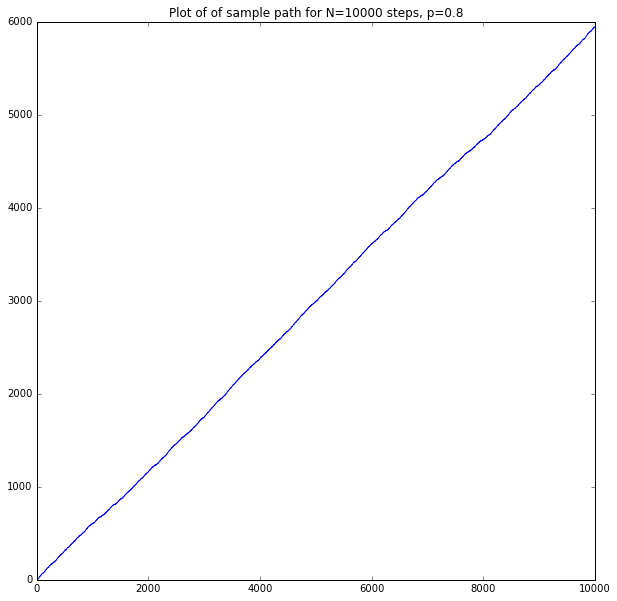

In [5]:
res = non_sym_walk(int(1e4), p=0.8)
fig=plt.figure()
fig.set_size_inches([10,10])
plt.plot(res)
plt.title('Plot of of sample path for N=10000 steps, p=0.8')
plt.show()

This random walk has tendency to go up as probability of heads is more than probability of tails, creating the tendency for a rise in the overall expected value as it is more likely for this walk to go in positive direction than it is to go in negative direction. The question suggests this random walk is not necessarily a martingale.It would be a super martingale if $E(M_{n+1}|F_n) >= M_n$ for all n <= 0

**Side note: Unlike symmetric random walk in the first question, the expected value is not about the origin. There is an obvious increase/decrease.**

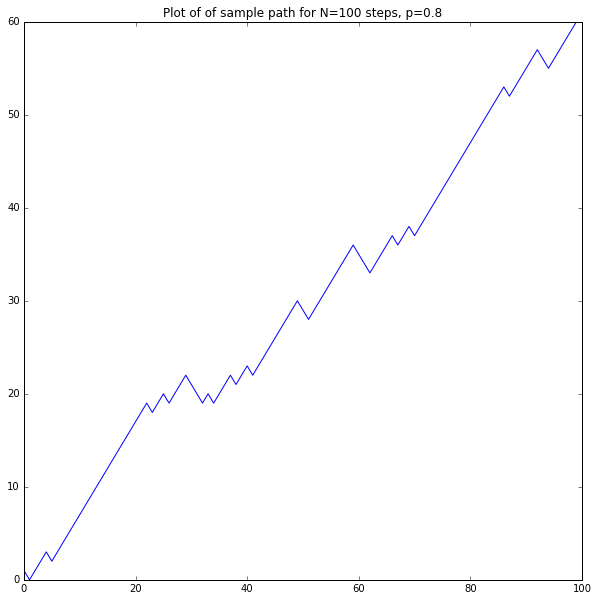

In [6]:
res = non_sym_walk(int(1e2), p=0.8)
fig=plt.figure()
fig.set_size_inches([10,10])
plt.plot(res)
plt.title('Plot of of sample path for N=100 steps, p=0.8')
plt.show()